# **Calories Burned Prediction**

**Importing important Libraries and Loading Dataset.**

Numpy:- In this Project we are using 'Numpy' Library for Numbers Operation here.

Pandas:- In this Project we are using 'Pandas' Library for EDA and data related task.

Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.

Seaborn:- With the help of 'Seaborn' we can visualize the data in advanced form.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('Calories Burned Prediction.csv')
df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [3]:
#Checking the null values

df.isnull().sum()

Activity, Exercise or Sport (1 hour)    0
130 lb                                  0
155 lb                                  0
180 lb                                  0
205 lb                                  0
Calories per kg                         0
dtype: int64

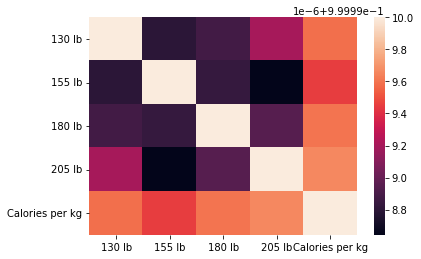

In [4]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)

In [5]:
#Converting categerical data into numerical data

var = pd.get_dummies(df['Activity, Exercise or Sport (1 hour)'], prefix='Activity, Exercise or Sport (1 hour)')
New_dataset = pd.concat([var,df], axis= 'columns')

In [6]:
#Dropping the categrical column

New_dataset.drop('Activity, Exercise or Sport (1 hour)', axis='columns', inplace=True)

In [7]:
New_dataset

,"Activity, Exercise or Sport (1 hour)_Aerobics, general","Activity, Exercise or Sport (1 hour)_Aerobics, high impact","Activity, Exercise or Sport (1 hour)_Aerobics, low impact","Activity, Exercise or Sport (1 hour)_Aerobics, step aerobics","Activity, Exercise or Sport (1 hour)_Archery","Activity, Exercise or Sport (1 hour)_Backpacking, Hiking with pack","Activity, Exercise or Sport (1 hour)_Badminton","Activity, Exercise or Sport (1 hour)_Bagging grass, leaves","Activity, Exercise or Sport (1 hour)_Ballet, twist, jazz, tap","Activity, Exercise or Sport (1 hour)_Ballroom dancing, fast","Activity, Exercise or Sport (1 hour)_Ballroom dancing, slow","Activity, Exercise or Sport (1 hour)_Basketball game, competitive","Activity, Exercise or Sport (1 hour)_Basketball, officiating","Activity, Exercise or Sport (1 hour)_Basketball, shooting baskets","Activity, Exercise or Sport (1 hour)_Basketball, wheelchair","Activity, Exercise or Sport (1 hour)_Bathing dog","Activity, Exercise or Sport (1 hour)_Billiards","Activity, Exercise or Sport (1 hour)_Bird watching","Activity, Exercise or Sport (1 hour)_Boating, power, speed boat","Activity, Exercise or Sport (1 hour)_Bowling","Activity, Exercise or Sport (1 hour)_Boxing, in ring","Activity, Exercise or Sport (1 hour)_Boxing, punching bag","Activity, Exercise or Sport (1 hour)_Boxing, sparring","Activity, Exercise or Sport (1 hour)_Calisthenics, light","Activity, Exercise or Sport (1 hour)_Calisthenics, vigorous, pushups, situps…","Activity, Exercise or Sport (1 hour)_Canoeing, camping trip","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, light","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, moderate","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, vigorous","Activity, Exercise or Sport (1 hour)_Carpentry, general","Activity, Exercise or Sport (1 hour)_Carrying 16 to 24 lbs, upstairs","Activity, Exercise or Sport (1 hour)_Carrying 25 to 49 lbs, upstairs","Activity, Exercise or Sport (1 hour)_Carrying heavy loads","Activity, Exercise or Sport (1 hour)_Carrying infant, level ground","Activity, Exercise or Sport (1 hour)_Carrying infant, upstairs","Activity, Exercise or Sport (1 hour)_Carrying moderate loads upstairs","Activity, Exercise or Sport (1 hour)_Carrying small children","Activity, Exercise or Sport (1 hour)_Children's games, hopscotch, dodgeball","Activity, Exercise or Sport (1 hour)_Circuit training, minimal rest","Activity, Exercise or Sport (1 hour)_Cleaning gutters",...,"Activity, Exercise or Sport (1 hour)_Track and field (shot, discus)","Activity, Exercise or Sport (1 hour)_Trampoline","Activity, Exercise or Sport (1 hour)_Unicycling","Activity, Exercise or Sport (1 hour)_Volleyball, beach","Activity, Exercise or Sport (1 hour)_Volleyball, competitive","Activity, Exercise or Sport (1 hour)_Walk / run, playing with animals","Activity, Exercise or Sport (1 hour)_Walk/run, playing with children, moderate","Activity, Exercise or Sport (1 hour)_Walk/run, playing with children, vigorous","Activity, Exercise or Sport (1 hour)_Walking 2.0 mph, slow","Activity, Exercise or Sport (1 hour)_Walking 2.5 mph","Activity, Exercise or Sport (1 hour)_Walking 3.0 mph, moderate","Activity, Exercise or Sport (1 hour)_Walking 3.5 mph, brisk pace","Activity, Exercise or Sport (1 hour)_Walking 3.5 mph, uphill","Activity, Exercise or Sport (1 hour)_Walking 4.0 mph, very brisk","Activity, Exercise or Sport (1 hour)_Walking 4.5 mph","Activity, Exercise or Sport (1 hour)_Walking 5.0 mph","Activity, Exercise or Sport (1 hour)_Walking downstairs","Activity, Exercise or Sport (1 hour)_Walking the dog","Activity, Exercise or Sport (1 hour)_Walking using crutches","Activity, Exercise or Sport (1 hour)_Walking, pushing a wheelchair","Activity, Exercise or Sport (1 hour)_Walking, snow blower","Activity, Exercise or Sport (1 hour)_Walking, under 2.0 mph, very slow","Activity, Exercise or Sport (1 hour)_Wallyball","Activity, Exercise or Sport (1 hour)_Water aerobics","Activity, Exercise o

In [8]:
#Seprating the feature X

X = New_dataset.iloc[:,:-1]
X

,"Activity, Exercise or Sport (1 hour)_Aerobics, general","Activity, Exercise or Sport (1 hour)_Aerobics, high impact","Activity, Exercise or Sport (1 hour)_Aerobics, low impact","Activity, Exercise or Sport (1 hour)_Aerobics, step aerobics","Activity, Exercise or Sport (1 hour)_Archery","Activity, Exercise or Sport (1 hour)_Backpacking, Hiking with pack","Activity, Exercise or Sport (1 hour)_Badminton","Activity, Exercise or Sport (1 hour)_Bagging grass, leaves","Activity, Exercise or Sport (1 hour)_Ballet, twist, jazz, tap","Activity, Exercise or Sport (1 hour)_Ballroom dancing, fast","Activity, Exercise or Sport (1 hour)_Ballroom dancing, slow","Activity, Exercise or Sport (1 hour)_Basketball game, competitive","Activity, Exercise or Sport (1 hour)_Basketball, officiating","Activity, Exercise or Sport (1 hour)_Basketball, shooting baskets","Activity, Exercise or Sport (1 hour)_Basketball, wheelchair","Activity, Exercise or Sport (1 hour)_Bathing dog","Activity, Exercise or Sport (1 hour)_Billiards","Activity, Exercise or Sport (1 hour)_Bird watching","Activity, Exercise or Sport (1 hour)_Boating, power, speed boat","Activity, Exercise or Sport (1 hour)_Bowling","Activity, Exercise or Sport (1 hour)_Boxing, in ring","Activity, Exercise or Sport (1 hour)_Boxing, punching bag","Activity, Exercise or Sport (1 hour)_Boxing, sparring","Activity, Exercise or Sport (1 hour)_Calisthenics, light","Activity, Exercise or Sport (1 hour)_Calisthenics, vigorous, pushups, situps…","Activity, Exercise or Sport (1 hour)_Canoeing, camping trip","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, light","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, moderate","Activity, Exercise or Sport (1 hour)_Canoeing, rowing, vigorous","Activity, Exercise or Sport (1 hour)_Carpentry, general","Activity, Exercise or Sport (1 hour)_Carrying 16 to 24 lbs, upstairs","Activity, Exercise or Sport (1 hour)_Carrying 25 to 49 lbs, upstairs","Activity, Exercise or Sport (1 hour)_Carrying heavy loads","Activity, Exercise or Sport (1 hour)_Carrying infant, level ground","Activity, Exercise or Sport (1 hour)_Carrying infant, upstairs","Activity, Exercise or Sport (1 hour)_Carrying moderate loads upstairs","Activity, Exercise or Sport (1 hour)_Carrying small children","Activity, Exercise or Sport (1 hour)_Children's games, hopscotch, dodgeball","Activity, Exercise or Sport (1 hour)_Circuit training, minimal rest","Activity, Exercise or Sport (1 hour)_Cleaning gutters",...,"Activity, Exercise or Sport (1 hour)_Track and field (hurdles)","Activity, Exercise or Sport (1 hour)_Track and field (shot, discus)","Activity, Exercise or Sport (1 hour)_Trampoline","Activity, Exercise or Sport (1 hour)_Unicycling","Activity, Exercise or Sport (1 hour)_Volleyball, beach","Activity, Exercise or Sport (1 hour)_Volleyball, competitive","Activity, Exercise or Sport (1 hour)_Walk / run, playing with animals","Activity, Exercise or Sport (1 hour)_Walk/run, playing with children, moderate","Activity, Exercise or Sport (1 hour)_Walk/run, playing with children, vigorous","Activity, Exercise or Sport (1 hour)_Walking 2.0 mph, slow","Activity, Exercise or Sport (1 hour)_Walking 2.5 mph","Activity, Exercise or Sport (1 hour)_Walking 3.0 mph, moderate","Activity, Exercise or Sport (1 hour)_Walking 3.5 mph, brisk pace","Activity, Exercise or Sport (1 hour)_Walking 3.5 mph, uphill","Activity, Exercise or Sport (1 hour)_Walking 4.0 mph, very brisk","Activity, Exercise or Sport (1 hour)_Walking 4.5 mph","Activity, Exercise or Sport (1 hour)_Walking 5.0 mph","Activity, Exercise or Sport (1 hour)_Walking downstairs","Activity, Exercise or Sport (1 hour)_Walking the dog","Activity, Exercise or Sport (1 hour)_Walking using crutches","Activity, Exercise or Sport (1 hour)_Walking, pushing a wheelchair","Activity, Exercise or Sport (1 hour)_Walking, snow blower","Activity, Exercise or Sport (1 hour)_Walking, under 2.0 mph, very slow","Activity, Exercise or Sport (1 hour)_Wallyball","Activity,

In [9]:
#Seprating the feature X

y = New_dataset.iloc[:,-1]
y

0      1.750730
1      0.823236
2      3.294974
3      1.234853
4      1.647825
         ...   
243    0.721008
244    0.515199
245    0.617427
246    0.823236
247    0.823236
Name: Calories per kg, Length: 248, dtype: float64

In [10]:
# Importing 'train_test_split' from sklearn library and spliting data into training and test part.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### **SVM**

In [11]:
# Importing support vector machine and using Regressor from there.

from sklearn.svm import SVR

In [12]:
# Creating class (Model) using support vector regressor.

support_vector_regressor = SVR(kernel='linear',C=32000)


In [13]:
# Fitting Model with training data.

support_vector_regressor.fit(X_train, y_train)


SVR(C=32000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
# Checking the accuracy score on test  data.

support_vector_regressor.score(X_test, y_test)


0.9935693015774792

## **RandomForestRegressor**

In [15]:
# Importing 'RandomForestRegressor'  from 'Ensemble' module using sklearn.

from sklearn.ensemble import RandomForestRegressor

In [16]:
# Creating a class with the name of Model and then passing how many tree we want to use in this algorithm.

model = RandomForestRegressor(n_estimators=50)


In [17]:
# Fitting our model on training dataset.

model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
# checking the accuracy level of Model.

model.score(X_test, y_test)


0.9994031531345048

## **`DecisionTreeRegressor`**

In [19]:
# Imporiting 'Decision Tree Regressor' from sklearn library.

from sklearn.tree import DecisionTreeRegressor


In [20]:
# Creating a class for DecisionTree

model = DecisionTreeRegressor()

In [21]:
# Fitting model with training dataset.

model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
# Checking the accuracy of our Model.

model.score(X_test, y_test)


0.9992702657051857

As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:

SVM :- As you have seen above in 'SVM' it's providing accuracy level = 91%.

RandomForestRegressor :- As you have seen above in 'RandomForestRegressor' it's providing accuracy level = 99%.

DecisionTreeRegressor :- As you have seen above in 'DecisionTreeRegressor' it's providing accuracy level = 99%.

Note:- So as it clearly mentioned that we are getting higher accuracy level from 'RandomForestRegressor' and 'DecisionTreeRegressor' So we'll use it for our Model.